# InstaBot Part-2

### InstaBot-1 and InstaBot-2 represent a sophisticated automation project meticulously designed to facilitate the establishment and growth of Instagram accounts for business purposes. These bots are engineered to streamline essential processes, allowing users to strategically navigate the intricacies of the Instagram platform with a focus on trend identification, targeted account following, and content optimization.

### Key functionalities encompass automated trend searches within specified business niches, affording users the ability to stay abreast of the latest developments and interests. Additionally, the bots facilitate the systematic following of pertinent accounts, fostering a network that is conducive to staying informed and engaged within the targeted industry.

### Furthermore, InstaBot-1 and InstaBot-2 undertake the crucial task of content analysis, evaluating performance metrics and discerning content types that resonate most effectively with the intended audience. This analytical capability empowers users to tailor their content creation strategies for optimal engagement and growth.

### The overarching objective of this project is to provide users with a comprehensive suite of tools to inform data-driven decision-making in the pursuit of sustained growth and influence within the competitive landscape of Instagram for business. It is imperative for users to exercise due diligence, ensuring adherence to Instagram's terms of service and upholding ethical standards in the deployment of these automation mechanisms.

In [164]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.support.wait import WebDriverWait
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np

In [2]:
link="https://www.instagram.com/"

In [229]:
driver=webdriver.Chrome()
driver.get(link)

In [293]:
username=""
password=""

In [5]:
def login(username, password):
    l=driver.find_elements('tag name','input')
    l[0].send_keys(username)
    l[1].send_keys(password)
    driver.find_element('xpath',
           '/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/section/main/article/div[2]/div[1]/div[2]/form/div/div[3]'
                      ).click()

In [230]:
login(username,password)
time.sleep(3)

## 1.1Getting top 10 accounts when search "food", and finding the top 5 accounts out of them with highest followers.

### support functions

In [13]:
def searchAndOpen(string):
    #clicking search button
    search_button=driver.find_element('xpath',
                '/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]/span/div/a/div'
                       )
    search_button.click()
    #waiting for popup
    search_input=WebDriverWait(driver,5).until(ec.visibility_of(driver.find_element('xpath',
                   '/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div/input'
                                                                      )))
    #entering string in search box
    search_input.send_keys(string)
    #wait
    time.sleep(3)
    #opening the first profile in list
    all_search=driver.find_element('xpath',
                                   '/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[2]/div'
                                  )
    first_search=all_search.find_elements('tag name','a')[0]
    first_search.click()    

In [7]:
def search(string):
    #clicking search button
    search_button=driver.find_element('xpath',
                '/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]/span/div/a/div'
                       )
    search_button.click()
    #waiting for popup
    search_input=WebDriverWait(driver,5).until(ec.visibility_of(driver.find_element('xpath',
                   '/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div/input'
                                                                      )))
    #entering string in search box
    search_input.send_keys(string)
    #wait
    time.sleep(3)

In [8]:
def get_top10_search():
    handles=[]
    count=0
    #hetting html content for search items
    all_search=driver.find_element('xpath',
                                   '/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[2]/div'
                                  )
    all_search_items=all_search.find_elements('tag name','a')
    #iterating through search items and filtering
    for i in all_search_items:
        if count==10:
            break
        if (len(i.text)!=0) and (i.text.startswith('#')==False) and (' ' not in i.text.splitlines()[0]):
            handles.append(i.text.splitlines()[0])
            count+=1
    return handles

In [61]:
def get_numbers(string):
    if ',' in string:
        string=string.split(',')
        string=string[0]+string[1]
        return int(string)
    if not string[-1].isalpha():
        return int(string)
    if string[-1]=='K':
        return int(float(string[:-1])*1000)
    if string[-1]=='M':
        return int(float(string[:-1])*1000000)

### 1.1 getting top 5 followed accounts out of top 10 search

In [62]:
def get_top5_outof_10(string):
    ans=[]
    #searching 'food'
    search(string)
    #getting top 10 handles
    handles=get_top10_search()
    #clearing search box
    search_button=driver.find_element('xpath',
                '/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]/span/div/a/div'
                       )
    search_button.click()
    time.sleep(2)
    #iterating through handles
    for i in handles:
        #searching each handle 
        search_button=driver.find_element('xpath',
                '/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]/span/div/a/div'
                       )
        search_button.click()
        search_input=WebDriverWait(driver,5).until(ec.visibility_of(driver.find_element('xpath',
                   '/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div/input'
                                                                      )))
        search_input.send_keys(i)
        time.sleep(2)
        #clicking the first search
        all_search=driver.find_element('xpath',
                                   '/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[2]/div'
                                  )
        all_search.find_element('tag name','a').click()
        driver.implicitly_wait(5)
        #getting the number of followers as string
        no_of_foll=driver.find_elements('css selector','span._ac2a')[1].text
        #converting the string into comparable integer value
        no_of_foll=get_numbers(no_of_foll)
        ans.append([no_of_foll, i])
        driver.back()
        driver.implicitly_wait(3)
    #sorting the list on basis of number of followers in descending order, and taking top 5
    ans.sort(reverse=True)
    return ans[:5]

In [63]:
top_five=get_top5_outof_10('food')

In [64]:
for i in top_five:
    print(i)

[3300000, 'howtofoodprep']
[1100000, 'foodpharmer']
[309000, 'foodtalkindia']
[309000, 'food']
[142000, 'foodzpah']


## 1.2 Getting the number of posts posted by each account in last 3 days.

In [87]:
def no_posts_3days(account):
    #opening account
    searchAndOpen(account)
    time.sleep(2)
    #scrolling down
    driver.execute_script("window.scrollTo(0, 600);")
    time.sleep(2)
    #getting posts row wise
    l=WebDriverWait(driver,5).until(ec.visibility_of(driver.find_element('css selector','div._ac7v._al3n')))
    l1=l.find_elements('css selector','div._aabd._aa8k._al3l')
    count=0
    #now iterating throgh posts of each rows and checking if we need to scroll down to load more content
    while True:
        for post in l1:
            post.click()
            time.sleep(2)
            a=driver.find_elements('tag name','time')[-1]
            temp=a.text.split()
            if temp[1]=='HOURS' or temp[1]=='DAY' or temp=='MINUTE' or temp=='HOUR' or temp=='MINUTES':
                count+=1
            elif temp[1]=='DAYS':
                if int(temp[0])<=2:
                    count+=1
                else:
                    return count
            else:
                return count
            driver.implicitly_wait(2)
            close_button=driver.find_element('xpath','/html/body/div[8]/div[1]/div/div[2]/div/div')
            close_button.click()
            driver.implicitly_wait(2)
        try:
            l=l.find_element(By.XPATH,'following-sibling::*[1]')
            l1=l.find_elements('css selector','div._aabd._aa8k._al3l')
            
        except NoSuchElementException:
            a=driver.execute_script("return document.body.scrollHeight")
            driver.execute_script(f"window.scrollTo({curr_h}, {curr_h+600});")
            b=driver.execute_script("return document.body.scrollHeight")
            curr_h+=600
            if a==b:
                return count
            time.sleep(2)

In [88]:
for i in top_five:
    time.sleep(2)
    i.append(no_posts_3days(i[1]))
    time.sleep(2)
    driver.back()
    time.sleep(2)
    driver.find_element('xpath',
        '/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[1]/div/span/div/a/div'
                   ).click()

In [89]:
for i in top_five:
    print(i[1],i[2])

howtofoodprep 18
foodpharmer 0
foodtalkindia 2
food 2
foodzpah 0


## 1.3 Depicting the information using bar graph

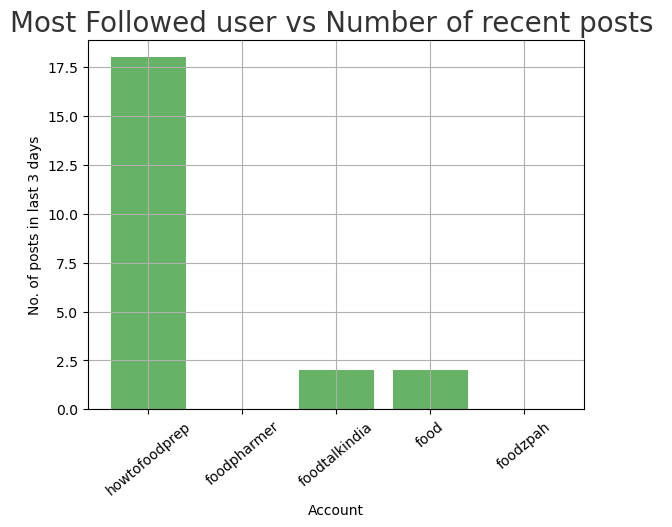

In [228]:
a=[i[1] for i in top_five]
b=[i[2] for i in top_five]
plt.bar(a, b, color='g', alpha=0.6)
plt.xticks(rotation=40)
plt.xlabel('Account')
plt.ylabel('No. of posts in last 3 days')
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='black',alpha=0.8)
plt.grid()
plt.show()

## 2.1 Scraping content of 10 posts from each handle 

In [114]:
#creating txt file for storing content
f=open('insta_data.txt','x')
f.close()

In [125]:
#scraping content of given number of posts and storing in .txt file
def scrape_content(account, noOf_posts):
    searchAndOpen(account)
    time.sleep(2)
    driver.execute_script("window.scrollTo(0, 600);")
    driver.implicitly_wait(3)
    ele=WebDriverWait(driver,5).until(ec.visibility_of(driver.find_element('css selector','div._ac7v._al3n')))
    l=ele.find_elements('css selector','div._aabd._aa8k._al3l')
    count=0
    while count<noOf_posts:
        for post in l:
            if count==noOf_posts:
                return
            post.click()
            driver.implicitly_wait(3)
            data=driver.find_element('css selector','h1._ap3a._aaco._aacu._aacx._aad7._aade').text
            with open('insta_data.txt','a',encoding='utf-8') as file:
                file.write(data)
                file.write('\n')
            count+=1
            driver.implicitly_wait(2)
            close_button=driver.find_element('xpath','/html/body/div[8]/div[1]/div/div[2]/div/div')
            close_button.click()
            driver.implicitly_wait(2)
        try:
            ele=ele.find_element(By.XPATH,'following-sibling::*[1]')
            l=ele.find_elements('css selector','div._aabd._aa8k._al3l')
        except NoSuchElementException:
            a=driver.execute_script("return document.body.scrollHeight")
            driver.execute_script(f"window.scrollTo({curr_h}, {curr_h+600});")
            b=driver.execute_script("return document.body.scrollHeight")
            curr_h+=600
            if a==b:
                return

In [126]:
# calling function one time each for every account and storing content in same file
for i in top_five:
    scrape_content(i[1],10)
    time.sleep(2)
    driver.find_element('xpath',
        '/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[1]/div/span/div/a/div'
                   ).click()
    time.sleep(2)

In [129]:
#printing the '.txt' file content
with open('insta_data.txt','r',encoding='utf-8') as file:
    print(file.read())

CHRISTMAS TREE CUPCAKE TOPPERS! 🎄 by @justataste

Ready to make your holidays sweeter and more meaningful? My 12 Days of Christmas Desserts Ebook is here to elevate your celebrations! It includes this recipe and 11 MORE holiday favorites. 🧁🍪🍰

100% of the proceeds from our new e-book will be donated directly to @nokidhungry, a nonprofit organization dedicated to ending childhood hunger. 🧡

👉🏻 COMMENT with the word HOLIDAY and I’ll DM you the clickable link to purchase and download the e-book right away!

#christmasdessert #christmasdessert #holidaybaking #bakingrecipes #nokidhungry #christmasspirit
1 or 2? Which of these two delicious but easy dinner recipes by @nutrientmatters would you love to try? 😋 Tag a friend that would absolutely love these! ♥️

1) Delicious Pot Beef Roast 🔥 Recipe ⬇️

1.5-2 lbs Beef roast (Rib-eye steaks also work great)
1 tsp garlic powder
1 tsp onion powder
1 tsp dried parsley
1/2 tsp mustard powder
Sea salt & black pepper
AP flour
1 yellow onion
6-8 garlic c

## 2.2 Counting frequency of each word

In [130]:
with open('insta_data.txt','r',encoding='utf-8') as file:
    scraped_content=file.read()

In [187]:
def count_words(content):
    dict={}
    words=content.split()
    for word in words:
        if word.isnumeric():
            continue
        if word.startswith('('):
            word=word[1:]
        if word.startswith(')'):
            word=word[:-1]
        dict[word]=dict.get(word,0) + 1
    return dict

In [188]:
count=count_words(scraped_content)
for key, value in count.items():
    print(key,':',value)

CHRISTMAS : 2
TREE : 2
CUPCAKE : 2
TOPPERS! : 2
🎄 : 2
by : 15
@justataste : 2
Ready : 2
to : 93
make : 10
your : 34
holidays : 3
sweeter : 2
and : 112
more : 7
meaningful? : 2
My : 6
Days : 2
of : 89
Christmas : 2
Desserts : 2
Ebook : 2
is : 53
here : 2
elevate : 2
celebrations! : 2
It : 3
includes : 2
this : 19
recipe : 2
MORE : 2
holiday : 2
favorites. : 2
🧁🍪🍰 : 2
100% : 2
the : 142
proceeds : 2
from : 15
our : 14
new : 3
e-book : 4
will : 9
be : 8
donated : 2
directly : 3
@nokidhungry, : 2
a : 84
nonprofit : 2
organization : 2
dedicated : 2
ending : 2
childhood : 2
hunger. : 2
🧡 : 2
👉🏻 : 2
COMMENT : 2
with : 34
word : 2
HOLIDAY : 2
I’ll : 2
DM : 2
you : 23
clickable : 2
link : 3
purchase : 2
download : 2
right : 4
away! : 2
#christmasdessert : 4
#holidaybaking : 2
#bakingrecipes : 2
#nokidhungry : 2
#christmasspirit : 2
or : 11
2? : 2
Which : 4
these : 5
two : 2
delicious : 6
but : 6
easy : 4
dinner : 2
recipes : 3
@nutrientmatters : 2
would : 9
love : 8
try? : 2
😋 : 2
Tag : 3
frien

## 2.3 Creating a dataframe and CSV file

In [189]:
def create_df(dict):
    data_list=[]
    for key, value in dict.items():
        data_list.append([key, value])
    df=pd.DataFrame(data_list, columns=['Word','Frequency'])
    return df

In [190]:
df=create_df(count)
df

,Word,Frequency
0,CHRISTMAS,2
1,TREE,2
2,CUPCAKE,2
3,TOPPERS!,2
4,🎄,2
...,...,...
1529,"Strawberries,",1
1530,Anyone?,1
1531,🍓,1
1532,#Improv,1


In [192]:
df.to_csv('word_freq.csv', index=False)

## 2.4 Most popular hashtags

In [221]:
def get_hash(dict):
    l=[]
    for key, value in dict.items():
        if key.startswith('#'):
            l.append([value, key])
    return sorted(l, reverse=True)

In [222]:
hash_count=get_hash(count)

In [223]:
for i in hash_count:
    print(i[1],':',i[0])

#FoodZpah : 9
#food : 5
#instafood : 4
#christmasdessert : 4
#TandooriChicken : 4
#Food : 4
#DiwaliWithBaileys : 4
#yummy : 3
#foodstagram : 3
#foodporn : 3
#Mahabaleshwar : 3
#nokidhungry : 2
#lebanon : 2
#indianfood : 2
#holidaybaking : 2
#christmasspirit : 2
#bakingrecipes : 2
#Yummy : 2
#WorldCupFever : 2
#WorldCup : 2
#Travel : 2
#Topupwithbaileys : 2
#TopUpWithBaileys : 2
#Tikkas : 2
#TasteOfDelhi : 2
#StreetFoodDelights : 2
#Strawberry : 2
#PinchOfSpiceDelights : 2
#NewInTown : 2
#MuttonSeekh : 2
#MuttonBurrah : 2
#Maharashtra : 2
#Kebabs : 2
#India : 2
#ITCHotels : 2
#ITC : 2
#IND : 2
#ICCWorldCupFeast : 2
#ICCWorldCup : 2
#HiddenGems : 2
#GalautiKebab : 2
#FoodtalkIndia : 2
#Festive : 2
#Dubai : 2
#Delicious : 2
#CulinaryOdyssey : 2
#CricketWorldCup : 2
#CricketMatch : 2
#Cricket : 2
#ChickenTikka : 2
#CelebrationEditionMenu : 2
#CelebrateWithITCHotels : 2
#BaileysIndia : 2
#Baileys : 2
#worldcup2022 : 1
#worldcup : 1
#wc : 1
#viral : 1
#uae : 1
#trending : 1
#travel : 1
#than

## 2.5 Plotting chart for the top 5 hashtags

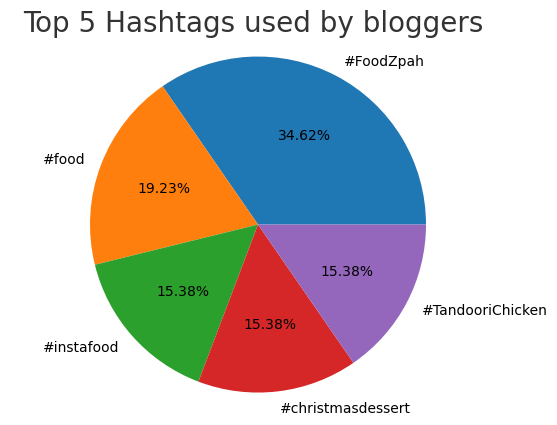

In [227]:
plt.pie([i[0] for i in hash_count[:5]], labels=[i[1] for i in hash_count[:5]], autopct='%0.2f%%')
plt.axis('equal')
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='black',alpha=0.8)
plt.show()

## 3.1 Getting likes for top 10 posts of the 5 handles

In [258]:
# this function will return a list of handle, number of followers and number of likes in forst 10 posts.
def top10likes(account):
    searchAndOpen(account)
    driver.implicitly_wait(5)
    s=driver.find_element('xpath'
            ,'/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[2]/div[2]/section/main/div/header/section/ul/li[2]/a/span/span'
                   ).text
    followers=get_numbers(s)
    driver.execute_script("window.scrollTo(0, 600);")
    driver.implicitly_wait(3)
    ele=WebDriverWait(driver,5).until(ec.visibility_of(driver.find_element('css selector','div._ac7v._al3n')))
    l=ele.find_elements('css selector','div._aabd._aa8k._al3l')
    count=0
    likes_count=0
    while count<10:
        for post in l:
            if count==10:
                return [account,followers,likes_count]
            post.click()
            driver.implicitly_wait(3)
            likes_count+=int(driver.find_element('xpath',
                            '/html/body/div[8]/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/span'
                               ).text.split()[0].replace(',',''))
            count+=1
            driver.implicitly_wait(2)
            close_button=driver.find_element('xpath','/html/body/div[8]/div[1]/div/div[2]/div/div')
            close_button.click()
            driver.implicitly_wait(2)
        try:
            ele=ele.find_element(By.XPATH,'following-sibling::*[1]')
            l=ele.find_elements('css selector','div._aabd._aa8k._al3l')
        except NoSuchElementException:
            a=driver.execute_script("return document.body.scrollHeight")
            driver.execute_script(f"window.scrollTo({curr_h}, {curr_h+600});")
            b=driver.execute_script("return document.body.scrollHeight")
            curr_h+=600
            if a==b:
                return [account,followers,likes_count]

In [259]:
ans=[]
for i in top_five:
    ans.append(top10likes(i[1]))
    time.sleep(2)
    driver.find_element('xpath',
        '/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[1]/div/span/div/a/div'
                   ).click()
    time.sleep(2)

In [261]:
# order of output- handle, followers, number of likes in first 10 posts
ans

[['howtofoodprep', 3300000, 33047],
 ['foodpharmer', 1100000, 3717757],
 ['foodtalkindia', 309000, 1511],
 ['food', 309000, 1511],
 ['foodzpah', 142000, 18736]]

## 3.2 Average likes for a handle

In [262]:
for i in ans:
    i.append(i[2]/10)
    print(i[0],':',i[3])

howtofoodprep : 3304.7
foodpharmer : 371775.7
foodtalkindia : 151.1
food : 151.1
foodzpah : 1873.6


## 3.3 Average followers : Like ratio

In [263]:
for i in ans:
    i.append(format(i[1]/i[3],'.2f'))
    print(i[0],':',i[4])

howtofoodprep : 998.58
foodpharmer : 2.96
foodtalkindia : 2045.00
food : 2045.00
foodzpah : 75.79


## 3.4 Bar graph

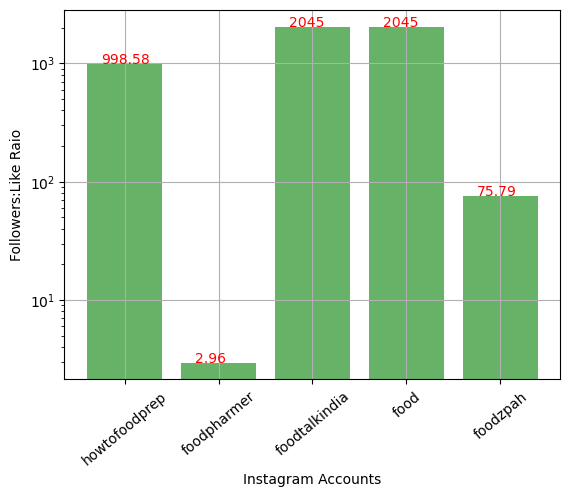

In [292]:
#data=[]
#for i in ans:
#    data.append(i[4],i[0])
#data=sorted(data, reverse)

x=[i[0] for i in ans]
y=[float(i[4]) for i in ans]
plt.bar(x,y,color='green',alpha=0.6)
plt.xlabel('Instagram Accounts')
plt.ylabel('Followers:Like Raio')
plt.xticks(rotation=40)
plt.yscale('log')
plt.text(-.25,998.58,'998.58',color='r')
plt.text(.75,2.96,'2.96',color='r')
plt.text(1.75,2045,'2045',color='r')
plt.text(2.75,2045,'2045',color='r')
plt.text(3.75,75.79,'75.79',color='r')
plt.grid()
plt.show()